# Pandas: missing values

Limpieza de valores faltantes con Pandas y dataset iris.

In [1]:
import pandas as pd

## Cargar los datos

In [2]:
df = pd.read_csv('../../data/iris_null.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,NaN,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## Detectar valores faltantes

In [3]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     6
petal_length    1
petal_width     1
species         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   144 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: >

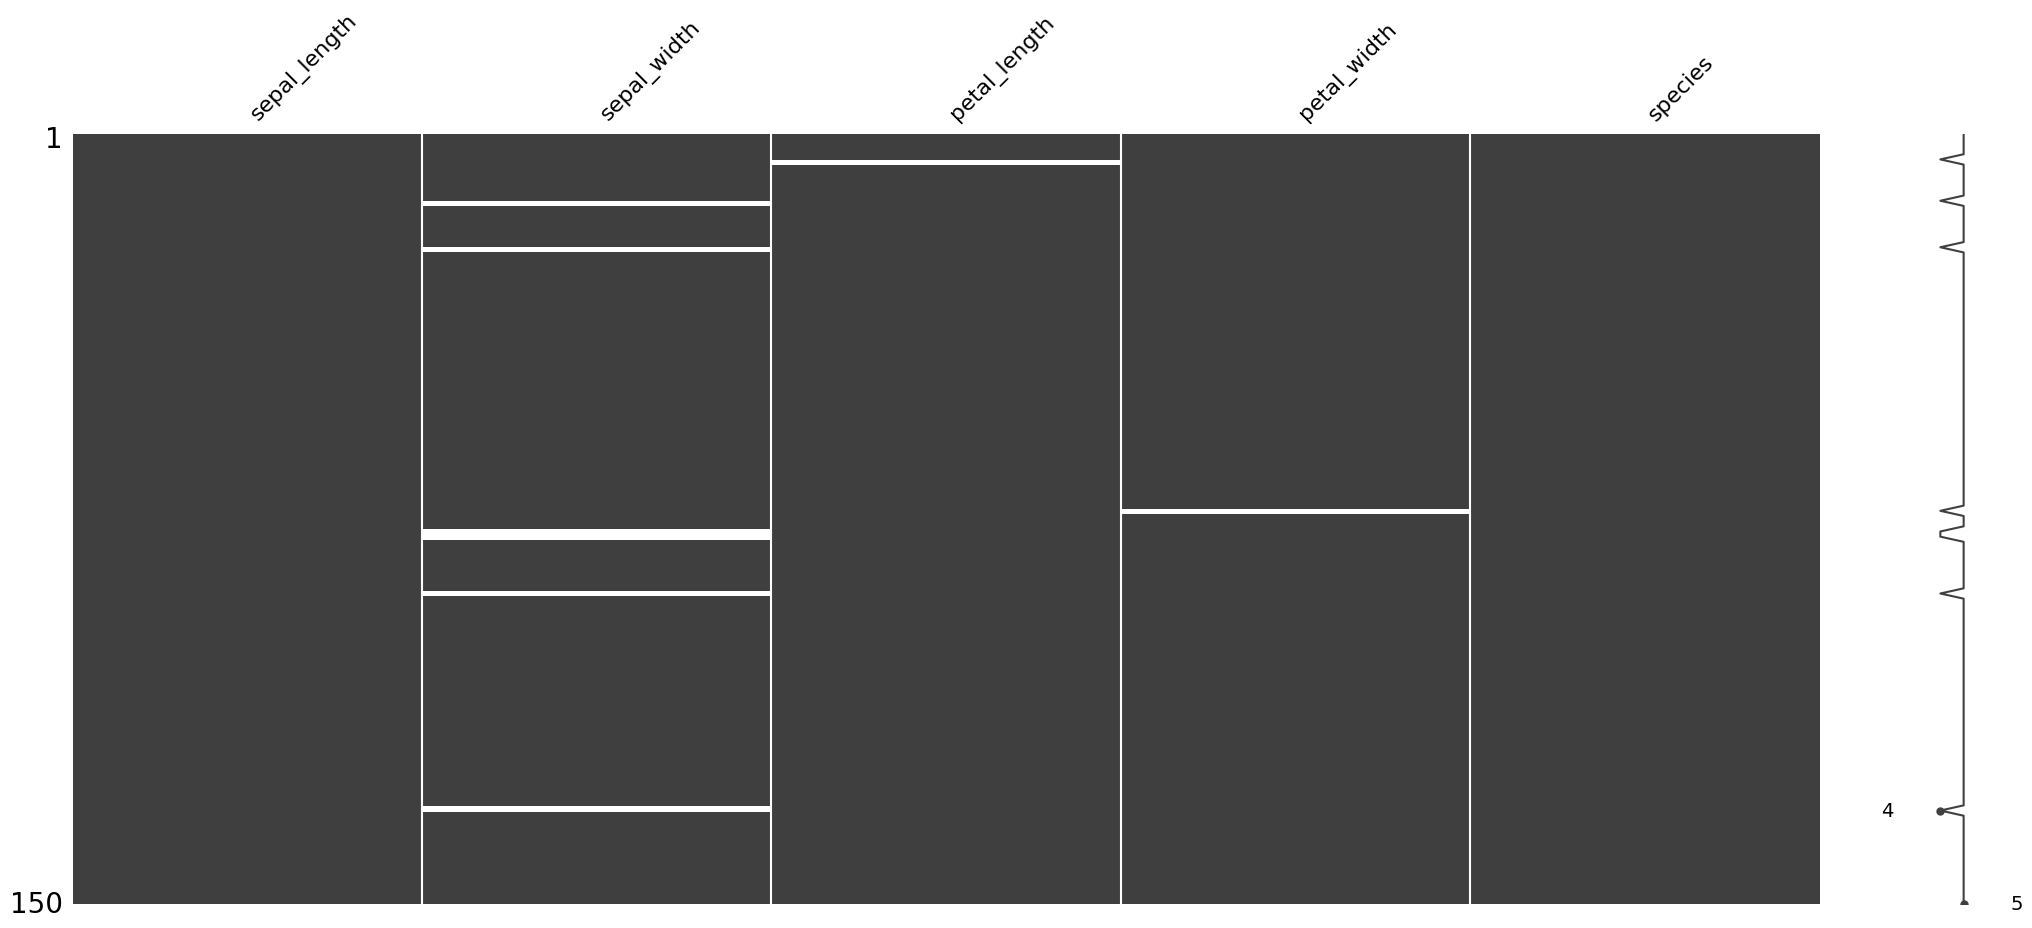

In [26]:
# Otra opción es instalar missingno
# https://github.com/ResidentMario/missingno
import missingno as msno
%matplotlib inline
msno.matrix(df)

## Tratar valores faltantes

### Borrar

In [9]:
# modifica el df original
# df.dropna(inplace=True)

# conserva el df original
df2 = df.dropna()
df2.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
# El original se conservan los nulos
df.isnull().sum()

sepal_length    0
sepal_width     6
petal_length    1
petal_width     1
species         0
dtype: int64

### Imputar

In [19]:
df2 = df.copy()

In [21]:
mean = df2['sepal_width'].mean()
median = df2['sepal_width'].median()
print(f"mean: {mean}")
print(f"median: {median}")

mean: 3.0541666666666667
median: 3.0


In [22]:
# df2['sepal_width'] = df2['sepal_width'].fillna(np.around(mean, 2))
df2['sepal_width'] = df2['sepal_width'].fillna(median)
df2.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    1
petal_width     1
species         0
dtype: int64

In [24]:
df2['petal_length'].fillna(df2['petal_length'].median(), inplace=True)
df2['petal_width'].fillna(df2['petal_width'].median(), inplace=True)

## Guardar resultados

In [25]:
df2.to_csv('../../data/iris_clean.csv', index=False)